# Bernstein-Vazirani algorithm

It consists in finding a secret bit string used to change an original message.
More precisely, let $ f : \{0,1\}^n \to \{0,1\} $ be defined as $ f(x) = x \cdot s \mod 2 $, then the goal is to find $s$ given $x$ and $f(x)$.

## Classical Approach
In classical computing, the algorithm evaluates the function $n$ times with input values $x=2^i \ ,\forall i \in \{0,1,\dots,n-1\}$, to check the bit value in every position of $s$. This leads to a $O(n)$ time complexity and even if it's not a bad result, it can be significantly improved with quantum techniques.

In [58]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit_aer import AerSimulator

n_bits = 4

Let's generate a random bits' sequence (hidden bits).

In [59]:
def random_hidden_bits(n):
    hidden_bits = np.random.randint(0,2**n-1) #random n-digit number
    hidden_bits = format(hidden_bits,'0'+str(n)+'b') #binary convert
    return hidden_bits

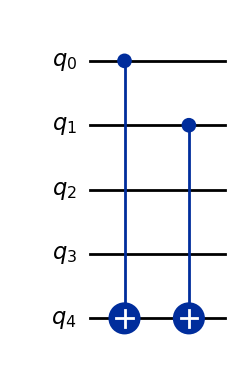

In [60]:
def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc

display(bv_function(random_hidden_bits(n_bits)).draw('mpl'))

In [61]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

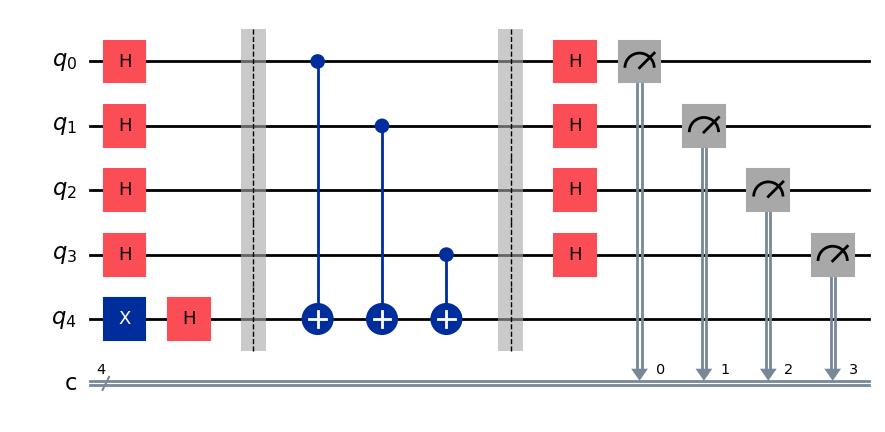

'1011'

In [62]:
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)

    display(qc.draw("mpl"))

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    return result.get_memory()[0]

display(bv_algorithm(bv_function(random_hidden_bits(n_bits))))